In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('AB_NYC_2019.csv')

In [4]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
strings=list(df.dtypes[df.dtypes == 'object'].index)
strings

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [7]:
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_').str.replace('-','_')

In [8]:
for col in df:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' 'cozy_entire_floor_of_brownstone'
 'entire_apt:_spacious_studio/loft_by_central_park']
47469

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11423

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018_10_19' '2019_05_21' nan '2019_07_05' '2018_11_19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

In [9]:
import matplotlib as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

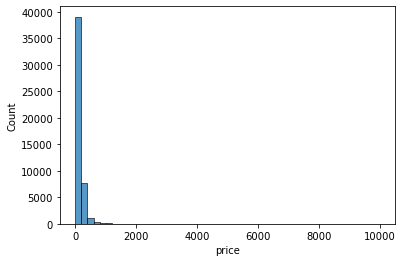

In [10]:
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

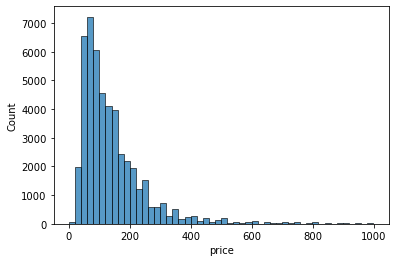

In [11]:
sns.histplot(df.price[df.price<1000],bins=50)

In [12]:
price_logs=np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

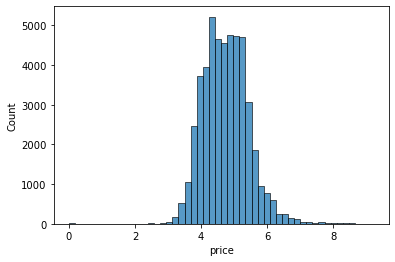

In [13]:
sns.histplot(price_logs,bins=50)

In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
n=len(df)

n_val=int(n*0.2)
n_tst=int(n*0.2)
n_trn=n-(n_val+n_tst)

In [16]:
n_trn, n_val, n_tst

(29337, 9779, 9779)

In [17]:
idx=np.arange(n)

In [18]:
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
df_trn=df.iloc[idx[:n_trn]]
df_val=df.iloc[idx[n_trn:n_trn+n_val]]
df_tst=df.iloc[idx[n_trn+n_val:]]

In [20]:
len(df_trn), len(df_val), len(df_tst)

(29337, 9779, 9779)

In [21]:
df_trn=df_trn.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_tst=df_tst.reset_index(drop=True)

In [22]:
y_trn=np.log1p(df_trn.price.values)
y_val=np.log1p(df_val.price.values)
y_tst=np.log1p(df_tst.price.values)

In [23]:
del df_trn['price']
del df_val['price']
del df_tst['price']

In [24]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
base=['latitude', 'longitude','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365','price']
features=['latitude', 'longitude','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [26]:
df_subset=df[base]

In [27]:
df_subset.isnull().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [28]:
df_subset['minimum_nights'].median()

3.0

In [29]:
df_trn=df_subset.iloc[idx[:n_trn]]
df_val=df_subset.iloc[idx[n_trn:n_trn+n_val]]
df_tst=df_subset.iloc[idx[n_trn+n_val:]]

In [30]:
len(df_trn), len(df_val), len(df_tst)

(29337, 9779, 9779)

In [31]:
df_trn=df_trn.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_tst=df_tst.reset_index(drop=True)

In [32]:
y_trn=np.log1p(df_trn.price.values)
y_val=np.log1p(df_val.price.values)
y_tst=np.log1p(df_tst.price.values)

In [33]:
del df_trn['price']
del df_val['price']
del df_tst['price']

In [34]:
mean_val_rpm=df_trn['reviews_per_month'].mean()
mean_val_rpm

1.3685492094777056

Linear Regression (fillna(0))

In [35]:
def prepare_X(df):
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [36]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [38]:
X_trn=prepare_X(df_trn)
w0, w = train_linear_regression(X_trn, y_trn)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score=rmse(y_val, y_pred)
round(score,2)

0.64

Linear Regression (fillna(trn_mean))

In [39]:
def prepare_X(df):
    df_num=df[features]
    df_num=df_num.fillna(mean_val_rpm)
    X=df_num.values
    return X

In [40]:
X_trn=prepare_X(df_trn)
w0, w = train_linear_regression(X_trn, y_trn)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score=rmse(y_val, y_pred)
round(score,2)

0.64

Regularization

In [41]:
def prepare_X(df):
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [42]:
def train_linear_regression_reg(X, y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX=XTX+(r*np.eye(XTX.shape[0]))
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_trn = prepare_X(df_trn)
    w0, w = train_linear_regression_reg(X_trn, y_trn,r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score=rmse(y_val, y_pred)
    score=round(score,2)
    print(r,"   ",score,"   ",w0)

0     0.64     -419.9126551485841
1e-06     0.64     -419.86271254075905
0.0001     0.64     -414.97648935850873
0.001     0.64     -375.27364997733105
0.01     0.66     -191.7838398787432
0.1     0.68     -32.562560537850175
1     0.68     -3.4992168409932445
5     0.68     -0.7033623154483706
10     0.68     -0.35127675989597107


In [44]:
r=0.001

Using different seed

In [45]:
scores=np.zeros(10)
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx=np.arange(n)
    df_subset=df[base]
    np.random.seed(s)
    np.random.shuffle(idx)
    df_trn=df_subset.iloc[idx[:n_trn]]
    df_val=df_subset.iloc[idx[n_trn:n_trn+n_val]]
    df_tst=df_subset.iloc[idx[n_trn+n_val:]]
    df_trn=df_trn.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_tst=df_tst.reset_index(drop=True)
    y_trn=np.log1p(df_trn.price.values)
    y_val=np.log1p(df_val.price.values)
    y_tst=np.log1p(df_tst.price.values)
    del df_trn['price']
    del df_val['price']
    del df_tst['price']
    X_trn = prepare_X(df_trn)
    w0, w = train_linear_regression(X_trn, y_trn)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores[s]=rmse(y_val, y_pred)
    print(s,"   ",scores[s],"   ",w0)

0     0.6549779961414438     -427.6284449058021
1     0.6462523685109162     -414.70555415090587
2     0.6476558177579959     -423.2541364142728
3     0.637514506955726     -421.8933101357883
4     0.6445809084000428     -422.0609828558506
5     0.6305809996755244     -429.17876294562495
6     0.6297851916850383     -427.4919027611459
7     0.6506184267079381     -428.1884711803581
8     0.6489780353528753     -427.6929139134662
9     0.6437565168746189     -426.98269749405193


In [46]:
scores_std=np.std(scores)
round(scores_std,3)

0.008

In [47]:
df_full_trn=pd.concat([df_trn, df_val])
df_full_trn = df_full_trn.reset_index(drop=True)
y_full_trn = np.concatenate([y_trn, y_val])
X_full_trn = prepare_X(df_full_trn)
w0, w = train_linear_regression_reg(X_full_trn, y_full_trn, r=0.001)

X_tst = prepare_X(df_tst)
y_pred = w0 + X_tst.dot(w)
score = rmse(y_tst, y_pred)
round(score,2)

0.65

In [56]:
ii=20
House = df_tst.iloc[ii].to_dict()
df_small = pd.DataFrame([House])
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]